In [10]:
*** Settings ***
Library   WhiteLibrary
Library   String
Library   robotkernel.WhiteLibraryCompanion
Library   OperatingSystem
Library   Collections

# Erik Kihn, HAMK, 24.11.2021

Close app | WhiteLibrary.Click Item
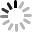

In [ ]:
*** Test Cases ***
Open application
   Launch application   F:/HAMK/2. Lukuvuosi 2021/2. Periodi/CRM app teht/MyCRM.exe
   Attach application by name   MyCRM
   @{win}=   Get application windows   
   Attach window   ${win}[0]
   
   Sleep   2s
   Click menu button   text:File
   Click menu button   text:Clear Fields
   
   # Check field is empty
   ${check}=   Get text from textbox    text:First: 
   should be equal   ${EMPTY}   ${check}


Read text from file and create word list, create a list by splitting the text
   ${path}=   Set variable   F:/HAMK/2. Lukuvuosi 2021/2. Periodi/Testaus/RobotFramework testaamista/crm_data.txt
   ${output}=   Get file   ${path}
   @{wordList}=   Split string   ${output}
   

   
   # Tarkistetaan zip code on sama
   Should be equal   ${wordList}[7]   334455
   Sleep   1s
   
   
   # Read text from newly created list to the text boxes accordingly
   #@{LIST}=   Create list   Donald   Duck   Male   Duckstreet1   Duckendaal   Ducksburg   AR   334455   555-54321   555-12345   555-98765   donald.duck@home.com   donald.duck@work.ca
   Input text to textbox   text:First:  ${wordList}[0]
   Input text to textbox   text:Last:  ${wordList}[1]
   Select Radio Button   text:${wordList}[2]
   Input text to textbox   text:Add Line 1:   ${wordList}[3]
   Input text to textbox   text:Add Line 2:   ${wordList}[4]
   Input text to textbox   text:City:   ${wordList}[5]
   #State AR
   Click button   id:DropDown
   Click item   text:${wordList}[6]
   Input text to textbox   text:Zip:   ${wordList}[7]
   Input text to textbox   text:Home:   ${wordList}[8]
   Input text to textbox   id:textBoxPeopleWorkPhone   ${wordList}[9]
   Input text to textbox   text:Mobile:   ${wordList}[10]
   Input text to textbox   text:Personal:   ${wordList}[11]
   Input text to textbox   text:Work:   ${wordList}[12]
    
    
Click ZIP button to verify zip code
   Click button   text:Zip Validation 
 
   
Click check box next to ”Active”
   Click button   text:Active
   
   
Switch TAB to ”Other”
   Click item   text:Other
   
   
Click button ”Save” and Click button Ok
   Click button   text:Save
   Click button   text:OK
   
Click button ”Browse…” and Click button Ok
   Click button   text:Browse...
   Click button   text:OK
   
Choose Menu-button ”Disable All” and verify that ”Item should be disabled” is ok 
   Click menu button   text:File
   Click menu button   text:Disable All
   Item should be disabled   id:tabControl1
   Sleep   1s
   
Click ”Enabled All” and verify ”Item should be enabled” 
   Click menu button   text:File
   Click menu button   text:Enabled All
   Item should be enabled   text:Other:

   
   
Close app
    Click item   text:Close